<a href="https://colab.research.google.com/github/Ahnaf-Shahadat-Taseen/Diamon-Price-Prediction/blob/main/G_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/cse303 project/diamonds.csv")

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.shape

(53940, 10)

In [ ]:
cut_C=df["cut"].value_counts()
cut_C

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [ ]:
duplicate = df[df.duplicated()]
duplicate

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [ ]:
df_copy=df.copy()

In [ ]:
df_copy.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df_copy=df_copy.drop(df_copy[df_copy['x']==0].index)
df_copy=df_copy.drop(df_copy[df_copy['y']==0].index)
df_copy=df_copy.drop(df_copy[df_copy['z']==0].index)
df_copy.shape

(53920, 10)

In [ ]:
df_copy['cut']=df_copy['cut'].replace({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})

In [ ]:
df_copy.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df_copy['color']=df_copy['color'].replace({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6})

In [ ]:
df_copy['clarity']=df_copy['clarity'].replace({"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7})

In [ ]:
df_copy.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
correlation = df_copy.corr()
correlation

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134953,-0.291360,-0.352757,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
cut,-0.134953,1.000000,0.020517,0.189153,-0.218073,-0.433306,-0.053491,-0.126232,-0.122181,-0.150647
color,-0.291360,0.020517,1.000000,-0.025783,-0.047373,-0.026481,-0.172431,-0.270671,-0.263915,-0.270011
clarity,-0.352757,0.189153,-0.025783,1.000000,-0.067457,-0.160256,-0.146789,-0.372865,-0.359015,-0.370250
depth,0.028259,-0.218073,-0.047373,-0.067457,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.433306,-0.026481,-0.160256,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.053491,-0.172431,-0.146789,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.126232,-0.270671,-0.372865,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.122181,-0.263915,-0.359015,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,-0.150647,-0.270011,-0.370250,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


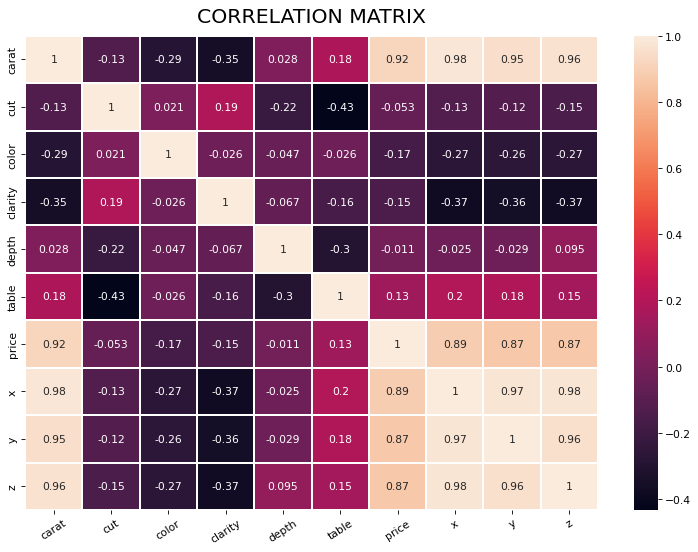

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xticks(rotation=33)
plt.show()

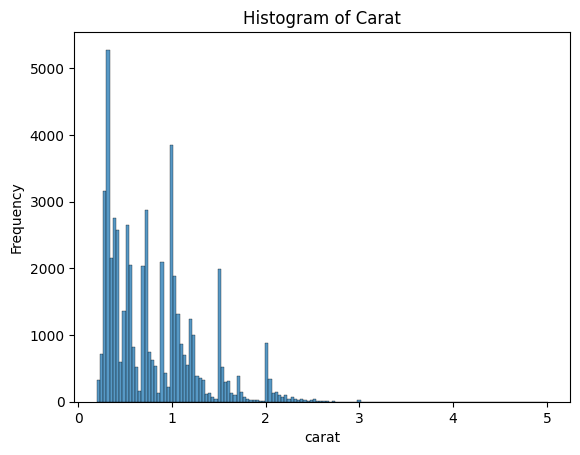

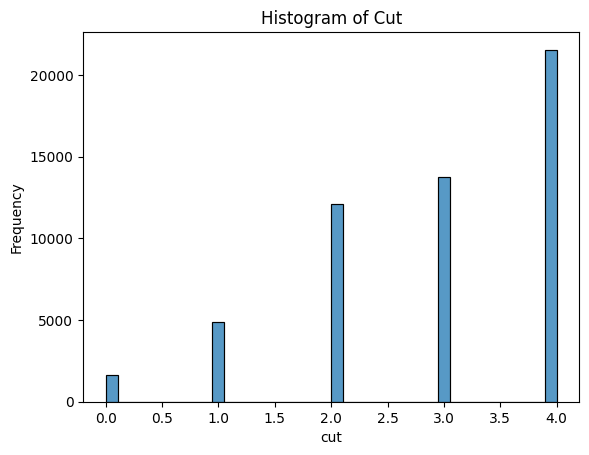

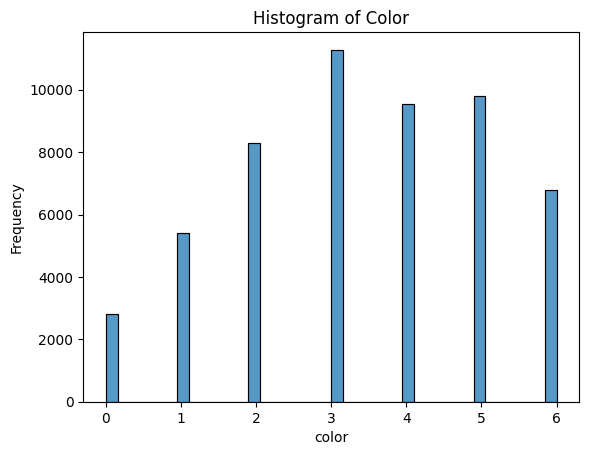

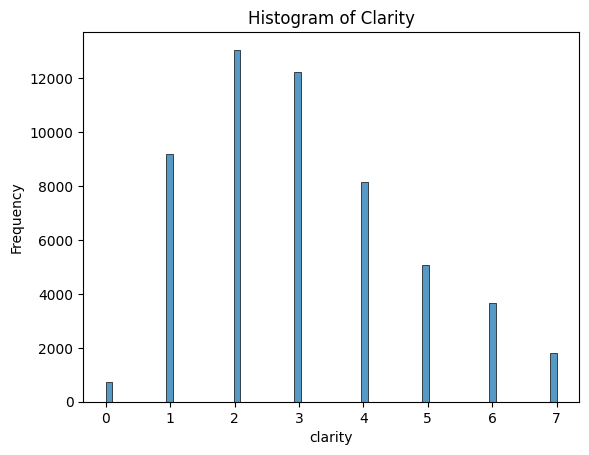

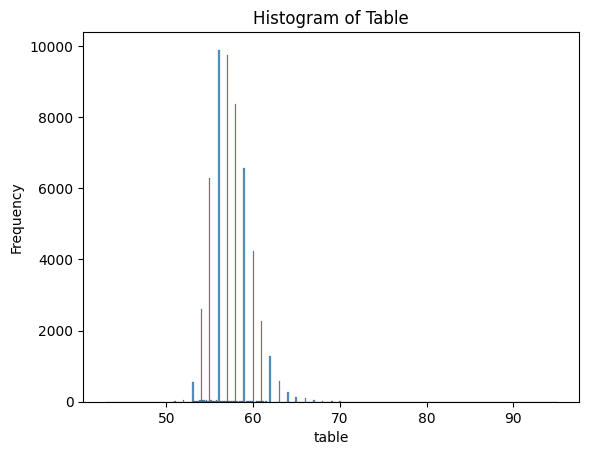

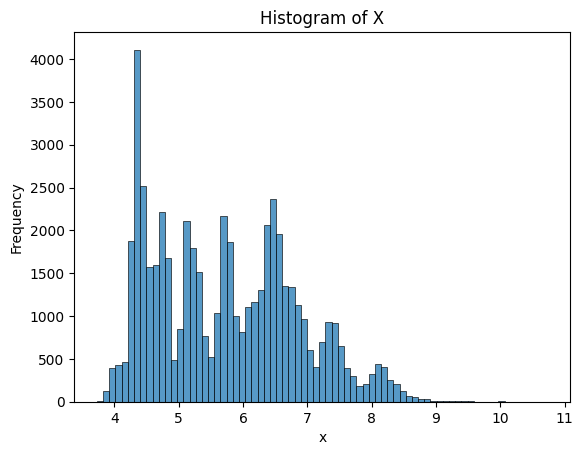

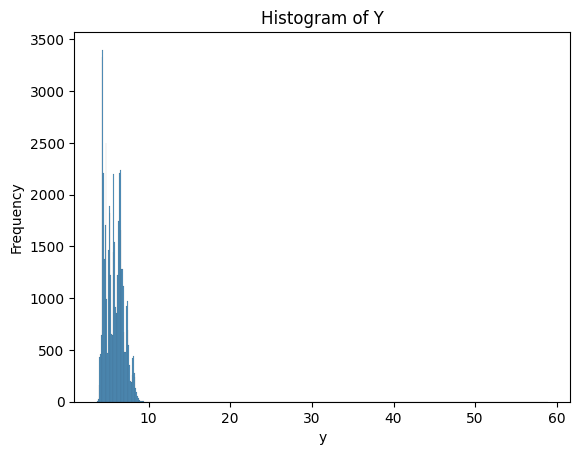

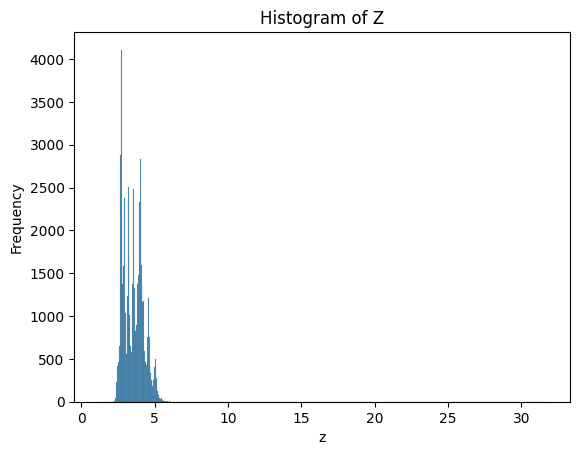

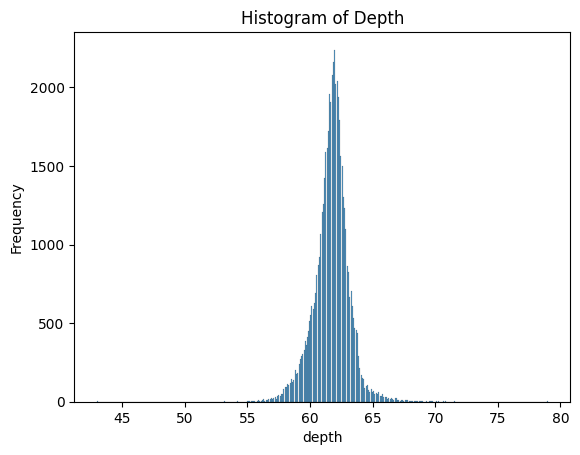

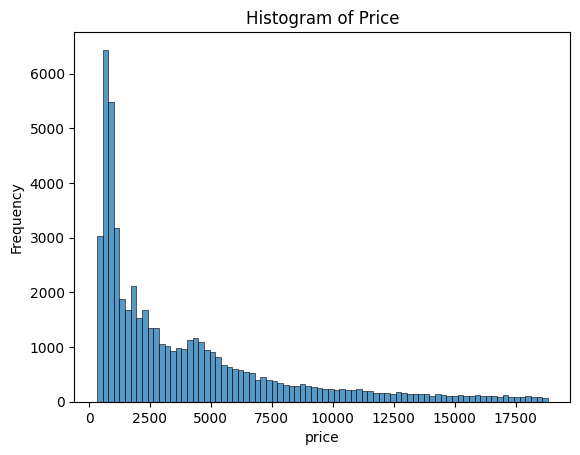

In [ ]:
columns = ['carat', 'cut', 'color', 'clarity','table','x','y','z','depth', 'price']

# Create histplot for each column
for column in columns:
    sns.histplot(data=df_copy, x=column)
    plt.title(f'Histogram of {column.capitalize()}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
features_to_scale = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']  # Example features

# Apply StandardScaler
scaler = StandardScaler()
df_copy[features_to_scale] = scaler.fit_transform(df_copy[features_to_scale])

In [ ]:
X= df_copy.drop(["price"],axis =1).values
y= df_copy["price"].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
X_train

array([[ 0.469198  ,  2.        ,  4.        , ...,  0.58814171,
         0.53951823,  0.69741924],
       [ 1.41898408,  3.        ,  4.        , ...,  1.55293355,
         1.47801986,  1.25256055],
       [-0.94492794,  4.        ,  6.        , ..., -1.10917728,
        -1.05681165, -1.08187984],
       ...,
       [ 0.51141072,  2.        ,  3.        , ...,  0.68640754,
         0.72371014,  0.56930971],
       [ 2.51651466,  1.        ,  0.        , ...,  1.9459969 ,
         2.03936663,  2.06392093],
       [-1.05045972,  3.        ,  6.        , ..., -1.23424289,
        -1.1883773 , -1.28116133]])

In [ ]:
X_test

array([[-1.05045972,  1.        ,  5.        , ..., -1.33250873,
        -1.29362982, -1.3380989 ],
       [-1.13488515,  4.        ,  6.        , ..., -1.45757434,
        -1.41642443, -1.40927087],
       [-0.96603429,  4.        ,  5.        , ..., -1.1270438 ,
        -1.08312478, -1.05341105],
       ...,
       [-1.19820422,  4.        ,  2.        , ..., -1.60050646,
        -1.54799008, -1.59431797],
       [-0.83939615,  2.        ,  5.        , ..., -0.93944538,
        -0.89016183, -0.91106712],
       [-0.60722622,  3.        ,  3.        , ..., -0.46598272,
        -0.48669384, -0.66908245]])

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
reg.score(X_train,y_train)

0.909286989089593

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

0.1478594415360271

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.38452495567391604

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8543113873383639

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
y_pred

array([-0.59098138, -0.71264262, -1.04900814, ..., -1.06007513,
       -0.87147494, -0.42861195])

In [ ]:
rf = RandomForestRegressor(n_estimators = 10)

In [ ]:
rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
metrics.r2_score(y_test,y_pred)

0.9807235956421709

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.13987005345036677

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

0.019563631852208458

Text(0.5, 1.0, 'Count of cut')

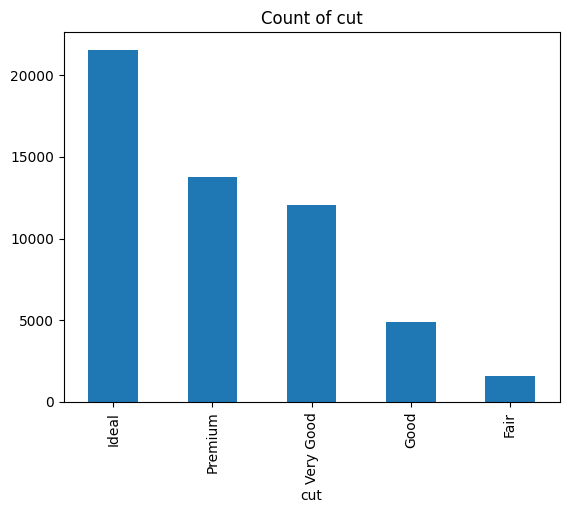

In [ ]:
df["cut"].value_counts().plot(kind='bar')
plt.title('Count of cut')

<Axes: xlabel='clarity', ylabel='price'>

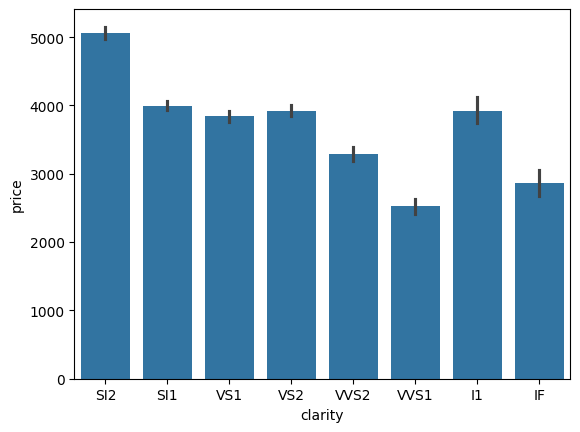

In [ ]:
# df["clarity"].value_counts().plot(kind='bar')
# plt.title('Count of clartiy')
sns.barplot(x="clarity", y="price", data=df)

<Axes: xlabel='cut', ylabel='price'>

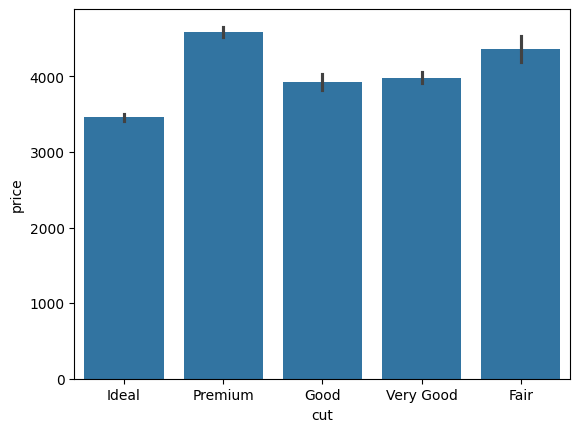

In [ ]:
sns.barplot(x="cut", y="price", data=df)

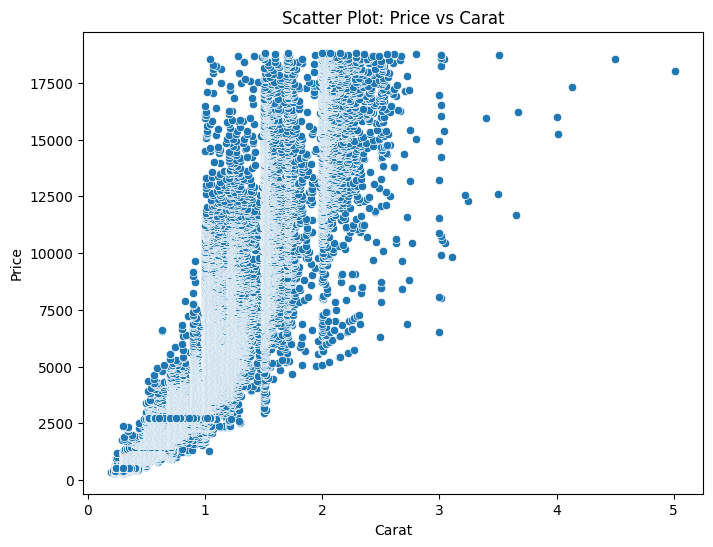

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Scatter Plot: Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

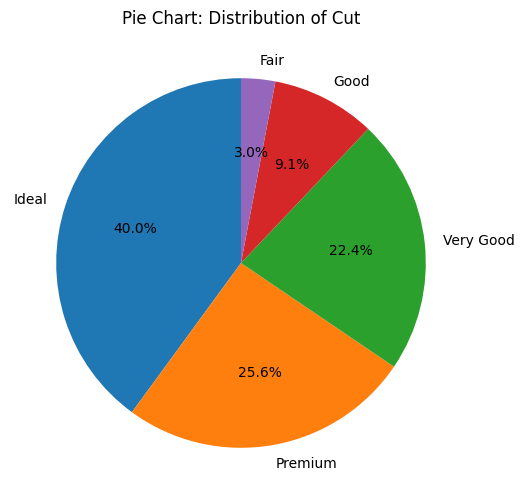

In [ ]:
cut_counts = df['cut'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Distribution of Cut')
plt.show()

<ipython-input-49-da53da0d3f78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='color', data=df, palette='Set2')


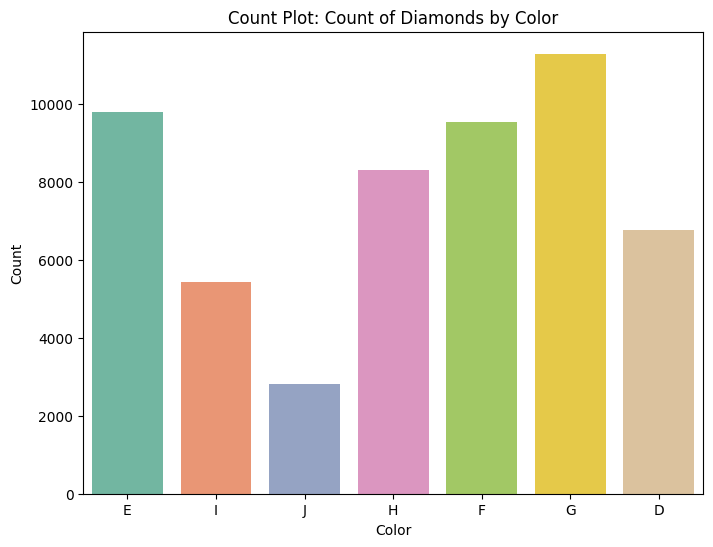

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='color', data=df, palette='Set2')
plt.title('Count Plot: Count of Diamonds by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()